#Setting working directory and file path

In [0]:
path_to_file = 'data/creditcard.csv'

#Code

## Imports

In [3]:
# Libraries to be imported
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from collections import Counter

import torch

# to make sure all the plots remain in the ipython notebook
get_ipython().run_line_magic('matplotlib', 'inline')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Original Data

### Processing Data

In [4]:
# To read data and checkout first five rows
data = pd.read_csv(path_to_file)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Class Imbalance')

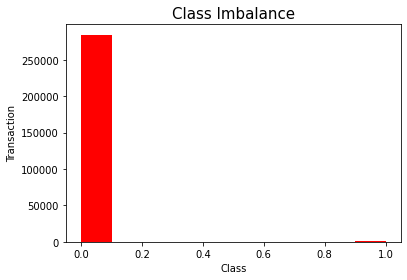

In [5]:
# Plot to visualize imbalance of the class
plt.hist(data['Class'], color='red')
plt.xlabel('Class')
plt.ylabel('Transaction')
plt.title('Class Imbalance', fontsize=15)


In [6]:
# To calculate percentage of fraud transactions
pc_fraud = len(data.loc[data['Class'] == 1].values)/len(data.loc[data['Class'] == 0].values)
pc_fraud

0.0017304750013189597

Text(0.5, 1.0, 'Fraudulent Transaction')

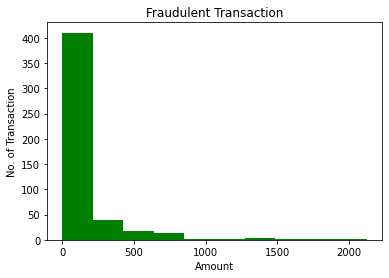

In [7]:
# To visualize the withdrawal pattern in fraud transactions
isFraudAmt = data.loc[data['Class']==1]['Amount']

plt.hist(isFraudAmt, color='green')
plt.xlabel('Amount')
plt.ylabel('No. of Transaction')
plt.title('Fraudulent Transaction')


Text(0.5, 1.0, 'Non-Fraudulent Transaction')

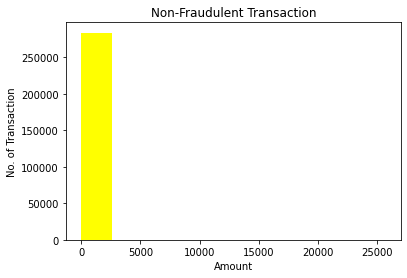

In [8]:
# To contrast wrt to the above pattern chart
notFraudAmt = data.loc[data['Class']==0]['Amount']

plt.hist(notFraudAmt, color='yellow')
plt.hist(isFraudAmt, color='green')
plt.xlabel('Amount')
plt.ylabel('No. of Transaction')
plt.title('Non-Fraudulent Transaction')


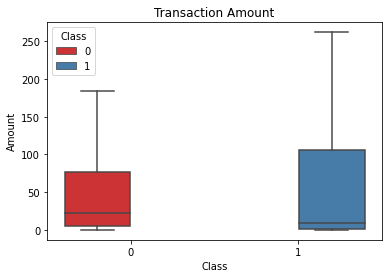

In [9]:
# To verify if the amount of withdrawal represents any bias towards any class 
#(Found no significant bias)
s = sns.boxplot(x="Class", y="Amount", hue="Class",data=data, 
                palette="Set1",showfliers=False).set_title("Transaction Amount")


In [0]:
# Used for Data Normalization to rectify any skewed values
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

data['Norm_Amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Norm_Time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
data = data.sample(frac=1)


In [0]:
# Function to plot Receiver Operating Characteristics
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


### Dimensionality Reduction using PCA (For Visualization )

In [0]:
# Extracting feature set (x-values) and target(y-values) from the data
x = data.drop('Class', axis=1)
y = data['Class']


In [0]:
# Applying primary component analysis to reduce feature the dimension from 30 --> 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)


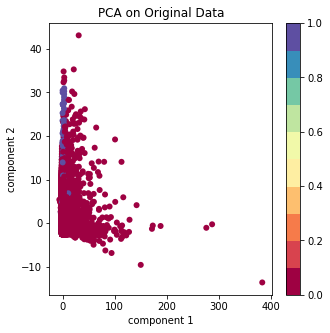

In [14]:
# Plotting the 2D data after applying PCA
plt.figure(figsize=(5, 5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, edgecolor='none',
        cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA on Original Data')
plt.colorbar()


### Classification with Original Data

In [0]:
# Train test split for training the models
x = data.drop('Class', axis=1).values
y = data['Class'].values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)



#### [1] Support Vector Machine

In [0]:
from sklearn.svm import SVC
svc = SVC()


In [0]:
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)


In [18]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))

AUPRC score: 0.6936691995757972
AUROC score: 0.8762913332036256
Accuracy score: 0.9994908886626171
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.92      0.75      0.83        93

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



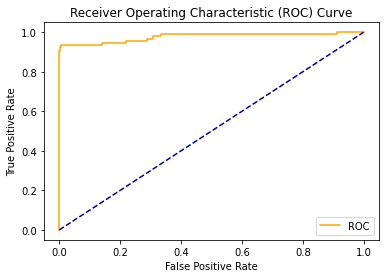

In [19]:
yscore = svc.decision_function(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore)
plot_roc_curve(fpr, tpr)

#### [2] Random Forest  Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(random_state=0)


In [0]:
random_clf.fit(xtrain, ytrain)
ypred = random_clf.predict(xtest)


In [22]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))


AUPRC score: 0.7670580357094375
AUROC score: 0.9085581898560681
Accuracy score: 0.9996137776061234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.94      0.82      0.87        93

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



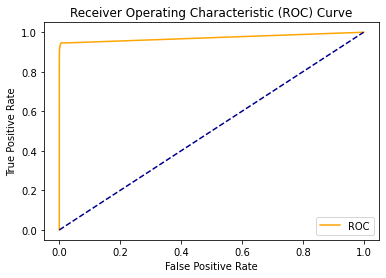

In [23]:
yscore = random_clf.predict_proba(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore[:,1])
plot_roc_curve(fpr, tpr)


#### [3] XGBoost

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier()


In [0]:
xgb.fit(xtrain, ytrain)
ypred = xgb.predict(xtest)


In [26]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))


AUPRC score: 0.7458849654616838
AUROC score: 0.9246344692962528
Accuracy score: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.88      0.85      0.86        93

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



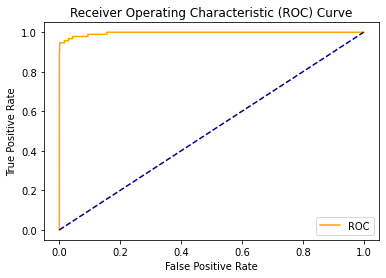

In [27]:
yscore = xgb.predict_proba(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore[:,1])
plot_roc_curve(fpr, tpr)

## Undersampled Data

### Processing Data

In [0]:
# Diffrentiating between fraudulent and non-fraudulent classes
# Under Sampling the majority class
fraud_data = data.loc[data['Class']==1]
not_fraud_data = data.loc[data['Class']==0][:492]
under_data = pd.concat([fraud_data, not_fraud_data])
under_data = under_data.sample(frac=1, random_state=0)


Text(0.5, 1.0, 'Under Sampled Data')

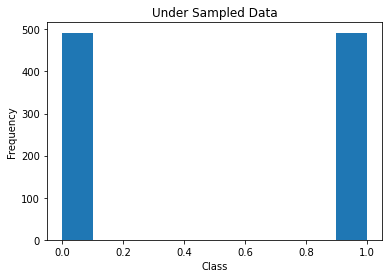

In [29]:
# To visualize the regained class balance
plt.hist(under_data['Class'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Under Sampled Data')


<Figure size 432x288 with 0 Axes>

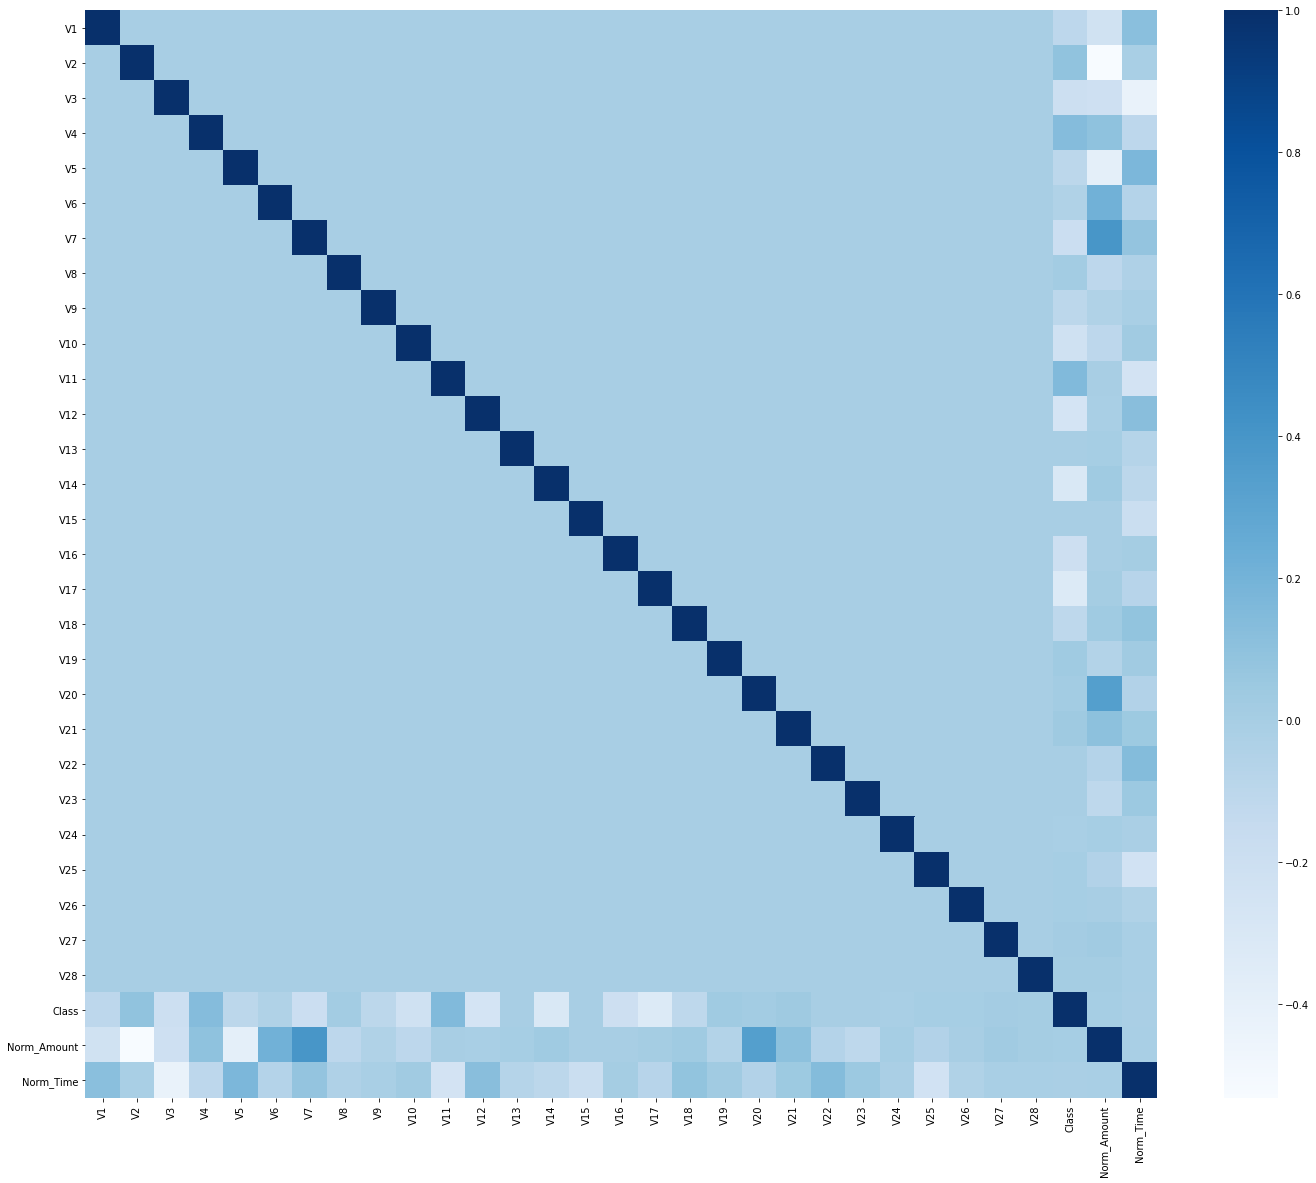

<Figure size 432x288 with 0 Axes>

In [30]:
# Confusion Matrix for the original data shows how the data is skewed towards one class only
plt.figure(figsize=(24,20))
original_corr = data.corr()
sns.heatmap(original_corr, cmap='Blues')
plt.figure('Confusion Matrix for Orginal Data')


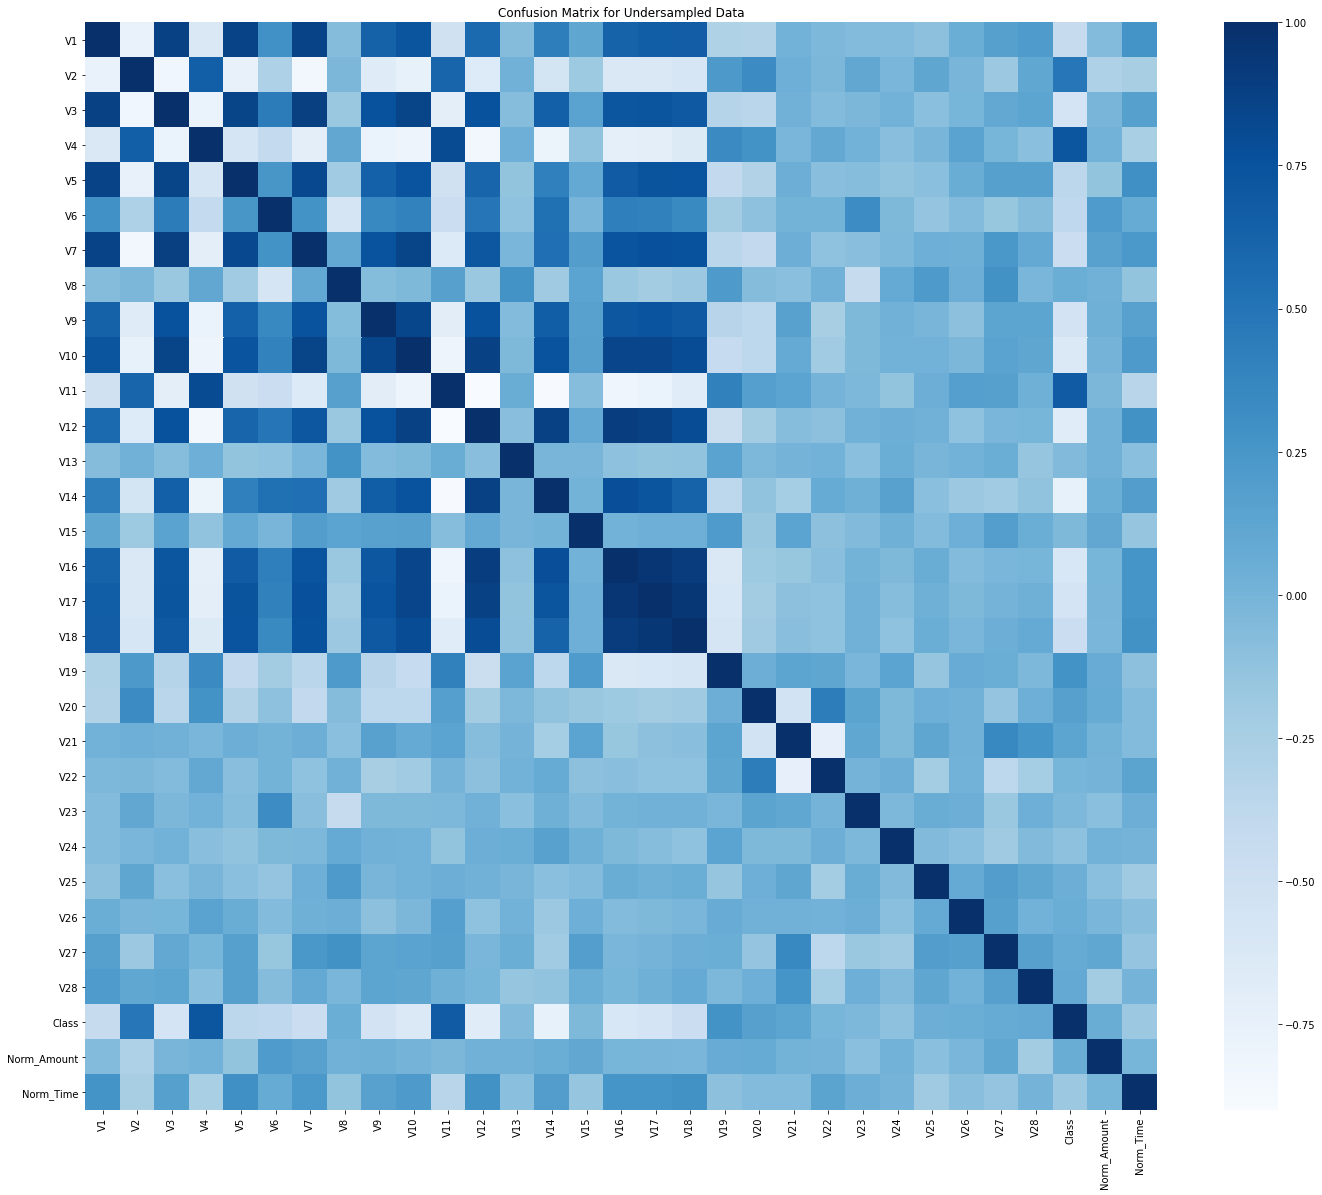

In [31]:
# Confusion Matrix for the under sampled data shows how the data is balanced towards both the classes
plt.figure(figsize=(24,20))
under_corr = under_data.corr()
sns.heatmap(under_corr, cmap='Blues')
plt.title('Confusion Matrix for Undersampled Data')
plt.show()


### Dimensionality Reduction using PCA and t-SNE


In [0]:
# Extracting the "feature set" and the  "targets" for model training
x = under_data.drop('Class', axis=1)
y = under_data['Class']

In [0]:
# Applying "primary component analysis" to reduce feature the dimension from 30 --> 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)


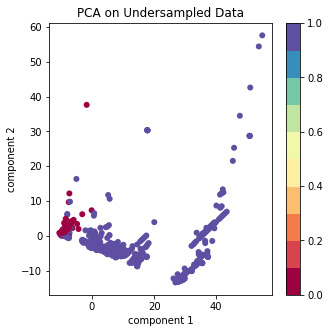

In [34]:
# Plotting the 2D data after applying PCA
plt.figure(figsize=(5, 5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, edgecolor='none',
        cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA on Undersampled Data')
plt.colorbar()


In [0]:
# Applying TSNE [T-Distributed Stochastic Neighbouring Entities]
# Better suited to visualize high-dimensional data
# Follows a probabilistic approach
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2, random_state=0).fit_transform(x)


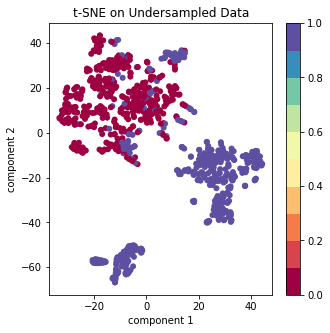

In [36]:
# Visualization of data using t-SNE approach 
plt.figure(figsize=(5, 5))
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y, edgecolor='none',
        cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('t-SNE on Undersampled Data')
plt.colorbar()


### Classification with Undersampled Data

In [0]:
# Train Test split for training the models
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

#### [1] Support Vector Machine


In [0]:

from sklearn.svm import SVC
svc = SVC()

In [0]:
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)


In [40]:

print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))


AUPRC score: 0.93629781978723
AUROC score: 0.9429661716171618
Accuracy score: 0.9441624365482234
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       101
           1       0.99      0.90      0.94        96

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



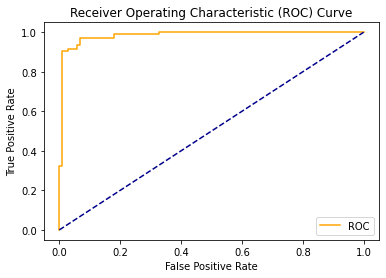

In [41]:
yscore = svc.decision_function(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore)
plot_roc_curve(fpr, tpr)


#### [2] Random Forest

In [0]:

from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(random_state=0)


In [0]:
random_clf.fit(xtrain, ytrain)
ypred = random_clf.predict(xtest)


In [44]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))



AUPRC score: 0.921726945854484
AUROC score: 0.9382735148514851
Accuracy score: 0.9390862944162437
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       101
           1       0.97      0.91      0.94        96

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



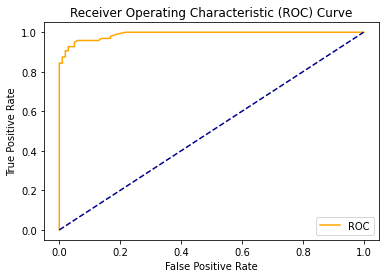

In [45]:
yscore = random_clf.predict_proba(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore[:,1])
plot_roc_curve(fpr, tpr)


#### [3] XGBoost

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [0]:
xgb.fit(xtrain, ytrain)
ypred = xgb.predict(xtest)


In [48]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))


AUPRC score: 0.9174207312587361
AUROC score: 0.9385313531353134
Accuracy score: 0.9390862944162437
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       101
           1       0.96      0.92      0.94        96

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



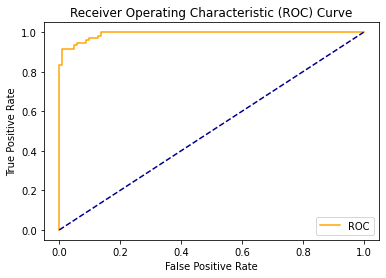

In [49]:
yscore = xgb.predict_proba(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore[:,1])
plot_roc_curve(fpr, tpr)


## Oversampled Data

### Processing Data

In [0]:
# Diffrentiating between fraudulent and non-fraudulent classes


not_fraud = data.loc[data['Class']==0]
is_fraud = data.loc[data['Class']==1]
not_fraud = not_fraud[:(len(not_fraud)//2)]  # Taking floor values
is_fraud = is_fraud[:(len(is_fraud)//2)]  # Taking floor values

new_data = pd.concat([not_fraud, is_fraud])
new_data = new_data.sample(frac=1, random_state=0)


In [51]:
# To calculate the percentage of minority class (fraudulent transactions)
(len(new_data.loc[new_data['Class']==1])/len(new_data.loc[new_data['Class']==0]))*100

0.17304810878113636

In [0]:
x = new_data.drop('Class', axis=1)
y = new_data['Class']

In [0]:
# Train - Test split for training the models
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [54]:
# Applying SMOTE for oversampling of the minority class
sm = SMOTE(random_state = 0)
xtrain_over, ytrain_over = sm.fit_sample(xtrain, ytrain.ravel()) 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Dimensionality Reduction using PCA


In [0]:
# Applying Primary Component Analysis to reduce the dimension of the feature set from 30 --> 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(xtrain_over)
x_pca = pca.transform(xtrain_over)


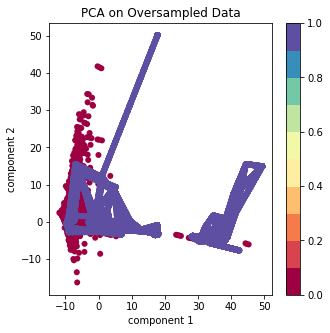

In [56]:
# 2D plot representing the data after applying PCA
plt.figure(figsize=(5, 5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=ytrain_over, edgecolor='none',
        cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA on Oversampled Data')
plt.colorbar()


In [0]:
# Converting the extracted "feature set" and "target values" to pandas dataframe for processing
x_df = pd.DataFrame(xtrain_over)
y_df = pd.DataFrame(ytrain_over)


In [0]:
x_df['Class'] = y_df # Adding the Class value to the dataframe
over_data = x_df 


Text(0.5, 1.0, 'Oversampled Data')

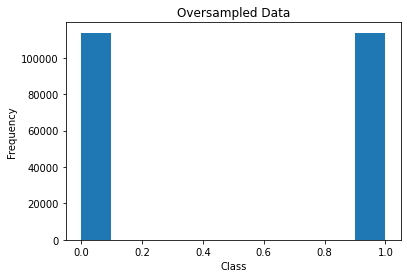

In [59]:
# Histogram plot to show the regained class balance achieved after applying SMOTE
plt.hist(over_data['Class'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Oversampled Data')


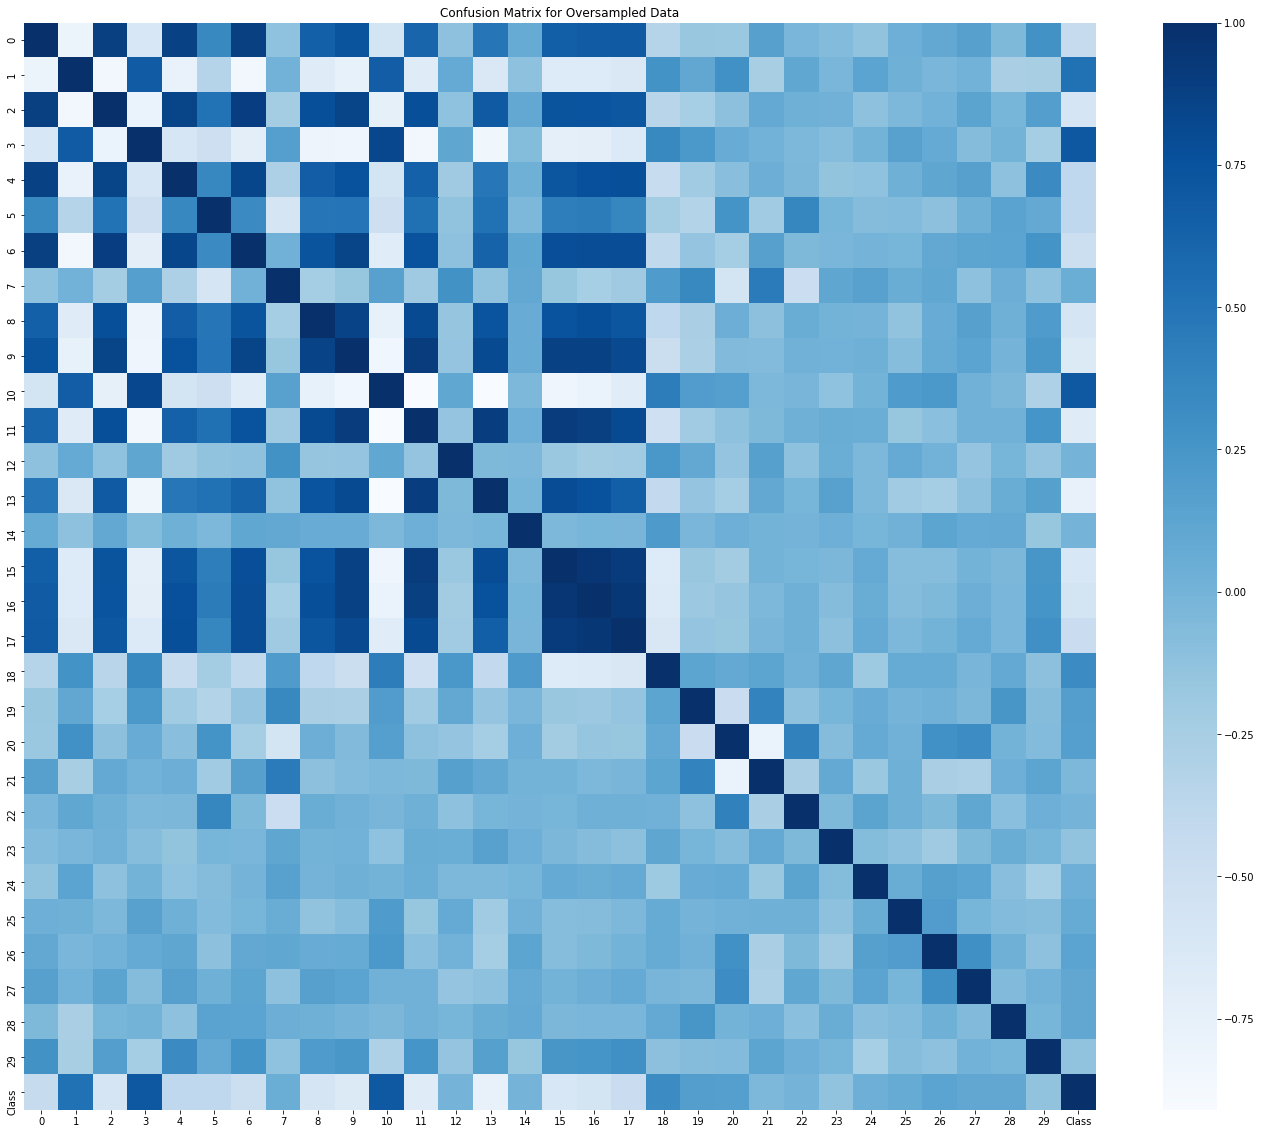

In [60]:
# Confusion Matrix of the Oversampled data to show how SMOTE results in balanced classes
plt.figure(figsize=(24,20))
over_corr = over_data.corr()
sns.heatmap(over_corr, cmap='Blues')
plt.title('Confusion Matrix for Oversampled Data')
plt.show()


### Classification with Oversampled Data

#### [1] Support Vector Machine

In [0]:

from sklearn.svm import SVC
svc = SVC()


In [0]:
svc.fit(xtrain_over, ytrain_over)


# In[46]:


ypred = svc.predict(xtest)


In [63]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))



AUPRC score: 0.08240540230015793
AUROC score: 0.9110405898003915
Accuracy score: 0.9885186615638496
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28439
           1       0.10      0.83      0.18        42

    accuracy                           0.99     28481
   macro avg       0.55      0.91      0.59     28481
weighted avg       1.00      0.99      0.99     28481



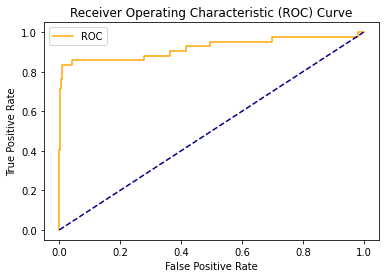

In [64]:
yscore = svc.decision_function(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore)
plot_roc_curve(fpr, tpr)


#### [2] Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(random_state=0)


In [0]:
random_clf.fit(xtrain_over, ytrain_over) 
ypred = random_clf.predict(xtest)


In [67]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))


AUPRC score: 0.6072385514294155
AUROC score: 0.8451677692772668
Accuracy score: 0.999403110845827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28439
           1       0.88      0.69      0.77        42

    accuracy                           1.00     28481
   macro avg       0.94      0.85      0.89     28481
weighted avg       1.00      1.00      1.00     28481



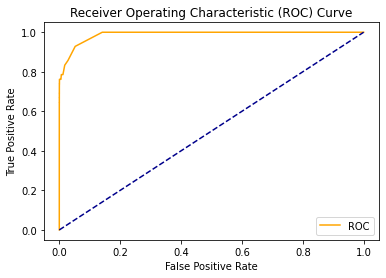

In [68]:
yscore = random_clf.predict_proba(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore[:,1])
plot_roc_curve(fpr, tpr)


#### [3] XGBoost

In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain_over, ytrain_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xtest_df = pd.DataFrame(xtest)
xtest_df.columns = [i for i in range(0, xtest_df.shape[1])]
xtest = xtest_df.values
ypred = xgb.predict(xtest)

In [71]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))


AUPRC score: 0.0911185442078193
AUROC score: 0.9000324838961922
Accuracy score: 0.9902742178996524
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28439
           1       0.11      0.81      0.20        42

    accuracy                           0.99     28481
   macro avg       0.56      0.90      0.60     28481
weighted avg       1.00      0.99      0.99     28481



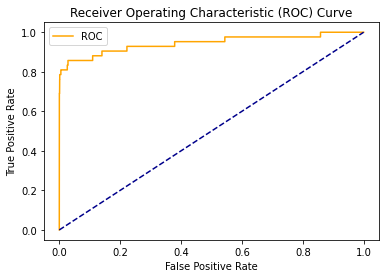

In [72]:
yscore = xgb.predict_proba(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore[:,1])
plot_roc_curve(fpr, tpr)

## "CMTNN + SMOTE" Approach

### Class Definitions for ANN

In [0]:
class Classifier(torch.nn.Module):
    def __init__(self, n_input=10, n_hidden = 20, n_output = 1,drop_prob=0.5):
        super().__init__()
        self.extractor1 = torch.nn.Linear(n_input, n_hidden)
        self.extractor2 = torch.nn.Linear(n_hidden, n_hidden)
        self.relu = torch.nn.ReLU()
        self.drop_out = torch.nn.Dropout(drop_prob)
        self.classifier = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, xb):
        x = self.relu(self.extractor1(xb))
        x = self.relu(self.extractor2(x))
        x = self.drop_out(x)
        return self.classifier(x).squeeze()

In [0]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [0]:
def train(epochs, model, loss_func, opt, train_dl, valid_dl):
    train_loss = []
    validation_loss = []
    for epoch in range(epochs):
        model.train()
        count = 0
        loss = 0
        for xb, yb in train_dl:
          losses, nums = loss_batch(model, loss_func, xb, yb, opt)
          loss += losses*nums
          count+=nums
        train_loss.append(loss/count)


        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        validation_loss.append(val_loss)

        print(epoch, val_loss)

    return train_loss, validation_loss

In [0]:
#Normalizing function [Rescales values of an array to fit in [0,1]]
def mat_normalize(arr):
  arr = arr - arr.min()
  arr = arr / arr.max()
  return arr


### Processing Data

In [0]:
# Diffrentiating between fraudulent and non-fraudulent classes
not_fraud = data.loc[data['Class']==0]
is_fraud = data.loc[data['Class']==1]
not_fraud = not_fraud[:(len(not_fraud)//2)]  # Taking floor values
is_fraud = is_fraud[:(len(is_fraud)//2)]  # Taking floor values

new_data = pd.concat([not_fraud, is_fraud])
new_data = new_data.sample(frac=1, random_state=0)


In [78]:
# To calculate the percentage of minority class (fraudulent transactions)
(len(new_data.loc[new_data['Class']==1])/len(new_data.loc[new_data['Class']==0]))*100

0.17304810878113636

In [0]:
x = new_data.drop('Class', axis=1).values
y = new_data['Class'].values

In [0]:
# This is used to scale and translate each feature individually 
# such that it is in the given range on the training set (Normalization of features)
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [0]:
# Train - Test split for training the models
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [82]:
print('Sampled train dataset shape %s' % Counter(ytrain))
print('Sampled validation dataset shape %s' % Counter(ytest))

Sampled train dataset shape Counter({0: 113718, 1: 204})
Sampled validation dataset shape Counter({0: 28439, 1: 42})


#### Applying CMTNN

##### Truth Network

In [0]:
# Creating Torch dataset for training Truth NN
train_ds_tnn = torch.utils.data.TensorDataset(torch.tensor(xtrain).float(), torch.tensor(ytrain).float())
valid_ds_tnn = torch.utils.data.TensorDataset(torch.tensor(xtest).float(), torch.tensor(ytest).float())


In [0]:
# Creating Torch dataloader for training Truth NN
bs =128 # Batch Size
train_dl_tnn = torch.utils.data.DataLoader(train_ds_tnn, batch_size=bs)
valid_dl_tnn = torch.utils.data.DataLoader(valid_ds_tnn, batch_size=bs)


In [0]:
# Static Model Parameters
n_input = xtrain.shape[1]
n_output = 1
n_hidden = 20

In [0]:
# Initializing the Truth NN model
TNN = Classifier(n_input=n_input,n_hidden=n_hidden,n_output=n_output,drop_prob=0.2)

In [0]:
# Static Training Parameters
lr = 0.005   # Learning Rate
pos_weight = torch.tensor([5])  # weight adjustment for class imbalance
opt = torch.optim.SGD(TNN.parameters(), lr=lr, momentum=0.9) #Optimizer
loss_func = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)  #Loss function
#loss_func = torch.nn.BCELoss()
n_epoch = 50  # No. of epochs to run training

In [88]:
# Start Training
train_loss_tnn, val_loss_tnn = train(n_epoch,TNN,loss_func,opt,train_dl_tnn,valid_dl_tnn)


0 0.040390704364203986
1 0.03883546071216916
2 0.03661911912196844
3 0.032997504922964764
4 0.029583627230778693
5 0.02626043306136185
6 0.023588194163700723
7 0.022415829901407405
8 0.020464053015910807
9 0.01991795766075734
10 0.01922651649144052
11 0.018721012188335853
12 0.018436721480329113
13 0.016347975071439678
14 0.016124231553053814
15 0.015591701920981244
16 0.015313661555576416
17 0.014990356800080209
18 0.014416281679962254
19 0.014978381981861171
20 0.014308069027813855
21 0.014946294674879497
22 0.01392000967298838
23 0.014496093391743764
24 0.014450333461323883
25 0.014983334897430839
26 0.014546201128512065
27 0.013767043280028056
28 0.014502422548647717
29 0.013646453907806775
30 0.014292330838932466
31 0.014259859311573196
32 0.014165956076926106
33 0.013860647431456062
34 0.01436293444510439
35 0.013652137308316629
36 0.013866149883894433
37 0.013624114290549556
38 0.014341830937851643
39 0.01375962343144928
40 0.013938609608387565
41 0.014770686576733208
42 0.01382

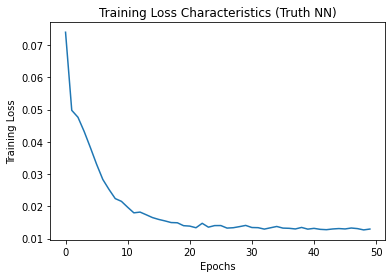

In [89]:
# Plot to visualize training loss
plt.plot(train_loss_tnn)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Characteristics (Truth NN)')
plt.show()


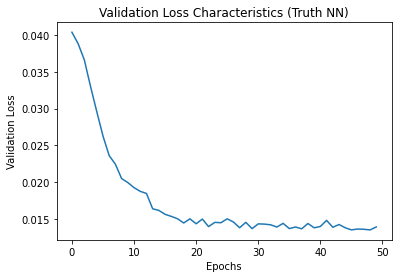

In [90]:
# Plot to visualize validation loss
plt.plot(val_loss_tnn)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Characteristics (Truth NN)')
plt.show()

In [0]:
# Using Truth NN to get classification on training set
ytrain_pred_tnn = TNN(torch.tensor(xtrain).float()).detach().numpy()
ytrain_pred_tnn = mat_normalize(ytrain_pred_tnn)

(array([3.0000e+00, 3.0000e+00, 2.0000e+00, 1.9000e+01, 3.2000e+01,
        1.3600e+02, 8.4500e+02, 8.1130e+03, 3.7360e+04, 4.5533e+04,
        1.7319e+04, 3.2140e+03, 7.5700e+02, 2.8900e+02, 7.1000e+01,
        1.3000e+01, 1.4000e+01, 3.2000e+01, 3.4000e+01, 1.3300e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       dtype=float32),
 <a list of 20 Patch objects>)

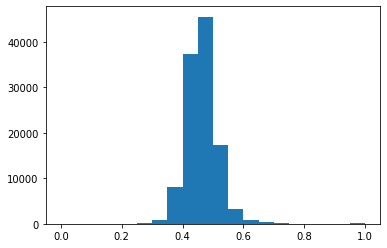

In [92]:
plt.hist(ytrain_pred_tnn, bins=20)

In [0]:
# Adjusting predictions to get binary output
ytrain_pred_tnn [ytrain_pred_tnn>=0.5] =1.0
ytrain_pred_tnn [ytrain_pred_tnn<0.5] =0.0

In [94]:
# Confusion matrix to visualize "TP", "FP", "TN", "FN"
#
# [TN FP]
# [FN TP]
print('Confusion matrix: {}'. format(metrics.confusion_matrix(ytrain, ytrain_pred_tnn, labels=[0, 1])))

Confusion matrix: [[92039 21679]
 [    7   197]]


In [95]:
# M_tnn = Misclassified samples using Truth NN
comb_tnn = ytrain_pred_tnn - ytrain
M_tnn = np.where(comb_tnn == 1)
M_tnn = list(M_tnn[0])
print(len(M_tnn))

21679


##### Falsity Network

In [0]:
# Preparing complement targets for "Falsity NN"
ytrain_fnn = 1-ytrain
ytest_fnn = 1-ytest

In [0]:
# Creating Torch dataset for training Falsity NN
train_ds_fnn = torch.utils.data.TensorDataset(torch.tensor(xtrain).float(), torch.tensor(ytrain_fnn).float())
valid_ds_fnn = torch.utils.data.TensorDataset(torch.tensor(xtest).float(), torch.tensor(ytest_fnn).float())


In [0]:
# Creating Torch dataloader for training Falsity NN
bs =128 # Batch Size
train_dl_fnn = torch.utils.data.DataLoader(train_ds_fnn, batch_size=bs)
valid_dl_fnn = torch.utils.data.DataLoader(valid_ds_fnn, batch_size=bs)


In [0]:
# Static Model Parameters
n_input = xtrain.shape[1]
n_output = 1
n_hidden = 20

In [0]:
# Initializing the "Falsity NN" model
FNN = Classifier(n_input=n_input,n_hidden=n_hidden,n_output=n_output,drop_prob=0.2)

In [0]:
# Static Training Parameters
lr = 0.005   # Learning Rate
pos_weight = torch.tensor([1/5])  # weight adjustment for class imbalance
opt = torch.optim.SGD(FNN.parameters(), lr=lr, momentum=0.9) #Optimizer
loss_func = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)  #Loss function
#loss_func = torch.nn.BCEWithLogitsLoss()
#loss_func = torch.nn.BCELoss()
n_epoch = 50  # No. of epochs to run training

In [102]:
# Start Training
train_loss_fnn, val_loss_fnn = train(n_epoch,FNN,loss_func,opt,train_dl_fnn,valid_dl_fnn)


0 0.008344867744495218
1 0.008211153026641833
2 0.008158502905479287
3 0.00810372938509841
4 0.008046000439160995
5 0.007989821268036398
6 0.00793296558598473
7 0.007876202154547098
8 0.007814365764283616
9 0.0077518940467472715
10 0.007681587523520996
11 0.007606383931425217
12 0.007521031896588085
13 0.0074280170068296006
14 0.007323987417738154
15 0.007208067995237374
16 0.007077078319904387
17 0.0069301443455151825
18 0.006768814943003293
19 0.006598112177576302
20 0.0064310357191646565
21 0.006267246164765138
22 0.006104294372593538
23 0.0059290711233509884
24 0.0057481781645836545
25 0.0055806909033518926
26 0.005417638665699725
27 0.005264062440279977
28 0.005097773875796089
29 0.004930812167091632
30 0.0047854363972561565
31 0.004625426101276634
32 0.004483995203231565
33 0.004346686821372765
34 0.00421750487772078
35 0.004094797112414891
36 0.003970034028060146
37 0.003868010665776279
38 0.0037636999315019534
39 0.003686784790540461
40 0.0035993889633031155
41 0.00351219722386

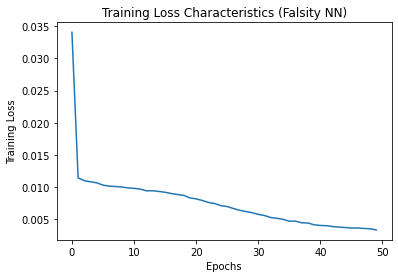

In [103]:
# Plot to visualize training loss
plt.plot(train_loss_fnn)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Characteristics (Falsity NN)')
plt.show()


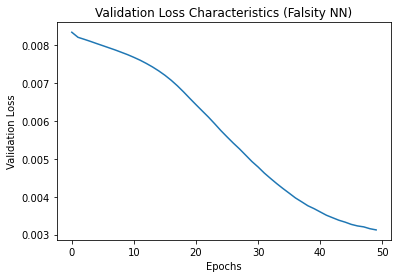

In [104]:
# Plot to visualize validation loss
plt.plot(val_loss_fnn)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Characteristics (Falsity NN)')
plt.show()

In [0]:
# Using the Falsity NN to get misclassified samples
ytrain_pred_fnn = FNN(torch.tensor(xtrain).float()).detach().numpy()
ytrain_pred_fnn = mat_normalize(ytrain_pred_fnn)

(array([5.4000e+01, 6.3000e+01, 3.3000e+01, 1.7000e+01, 1.5000e+01,
        1.0000e+01, 2.6000e+01, 4.4000e+01, 1.1700e+02, 6.4100e+02,
        2.7260e+03, 1.5011e+04, 4.2235e+04, 4.3330e+04, 8.7230e+03,
        7.6800e+02, 8.7000e+01, 1.5000e+01, 3.0000e+00, 4.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       dtype=float32),
 <a list of 20 Patch objects>)

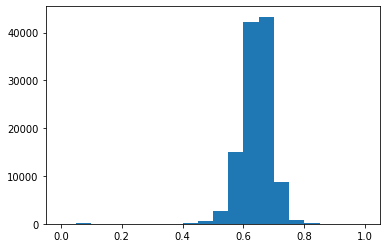

In [106]:
plt.hist(ytrain_pred_fnn, bins=20)

In [0]:
# Adjusting the predictions to output binary predictions
ytrain_pred_fnn [ytrain_pred_fnn>=0.5] =1.0
ytrain_pred_fnn [ytrain_pred_fnn<0.5] =0.0

In [108]:
# Confusion matrix to visualize "TP", "FP", "TN", "FN"
#
# [TN FP]
# [FN TP]
print('Confusion matrix: {}'. format(metrics.confusion_matrix(ytrain_fnn, ytrain_pred_fnn, labels=[0, 1])))

Confusion matrix: [[   172     32]
 [   848 112870]]


In [109]:
#M_fnn = List of samples misclassified by Falsity NN 
comb_fnn = ytrain_fnn - ytrain_pred_fnn
M_fnn = np.where(comb_fnn == 1)
M_fnn = list(M_fnn[0])
print(len(M_fnn))

848


##### Combining Truth and Falsity networks

In [0]:
M_intersection = list(set(M_fnn).intersection(M_tnn))
M_union = list(set(M_fnn).union(M_tnn))

In [111]:
print(len(M_union))
print(len(M_intersection))

21695
832


In [112]:
# Finally removing the union of misclassified samples under-sample majority class
# Please note that the minority class samples are left untouched
xtrain_cm = np.delete(xtrain, M_union, axis=0)
ytrain_cm = np.delete(ytrain, M_union, axis=0)
print('Train dataset shape after CMTNN %s' % Counter(ytrain_cm))

Train dataset shape after CMTNN Counter({0: 92023, 1: 204})


In [113]:
print('Original train dataset shape %s' % Counter(ytrain))
print('CMTNN train dataset shape %s' % Counter(ytrain_cm))
print('Original test dataset shape %s' % Counter(ytest))

Original train dataset shape Counter({0: 113718, 1: 204})
CMTNN train dataset shape Counter({0: 92023, 1: 204})
Original test dataset shape Counter({0: 28439, 1: 42})


#### Applying SMOTE

In [114]:
# Using SMOTE(Applied on the training set only) to over-sample the minority class
sm = SMOTE(random_state = 1)
xtrain_cm_sm, ytrain_cm_sm = sm.fit_sample(xtrain_cm, ytrain_cm.ravel()) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [115]:
print('Original train dataset shape %s' % Counter(ytrain))
print('Resampled train dataset shape %s' % Counter(ytrain_cm_sm))
print('Original validation dataset shape %s' % Counter(ytest))

Original train dataset shape Counter({0: 113718, 1: 204})
Resampled train dataset shape Counter({0: 92023, 1: 92023})
Original validation dataset shape Counter({0: 28439, 1: 42})


### Dimensionality Reduction using PCA


In [0]:
# Applying Primary Component Analysis to reduce the dimension of the feature set from 30 --> 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(xtrain_cm_sm)
x_pca = pca.transform(xtrain_cm_sm)


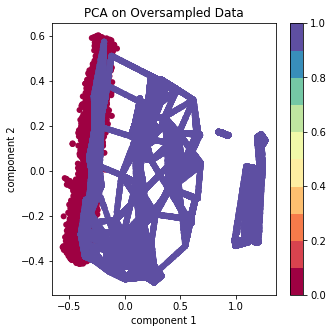

In [117]:
# 2D plot representing the data after applying PCA
plt.figure(figsize=(5, 5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=ytrain_cm_sm, edgecolor='none',
        cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA on Oversampled Data')
plt.colorbar()


In [0]:
# Converting the extracted "feature set" and "target values" to pandas dataframe for processing
x_df = pd.DataFrame(xtrain_cm_sm)
y_df = pd.DataFrame(ytrain_cm_sm)


In [0]:
x_df['Class'] = y_df # Adding the Class value to the dataframe
over_data = x_df 


Text(0.5, 1.0, 'Oversampled Data')

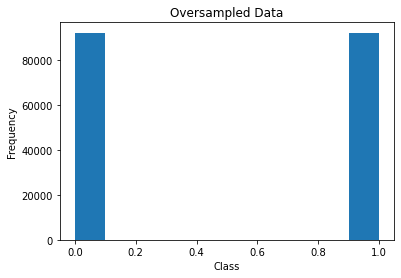

In [120]:
# Histogram plot to show the regained class balance achieved after applying SMOTE
plt.hist(over_data['Class'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Oversampled Data')


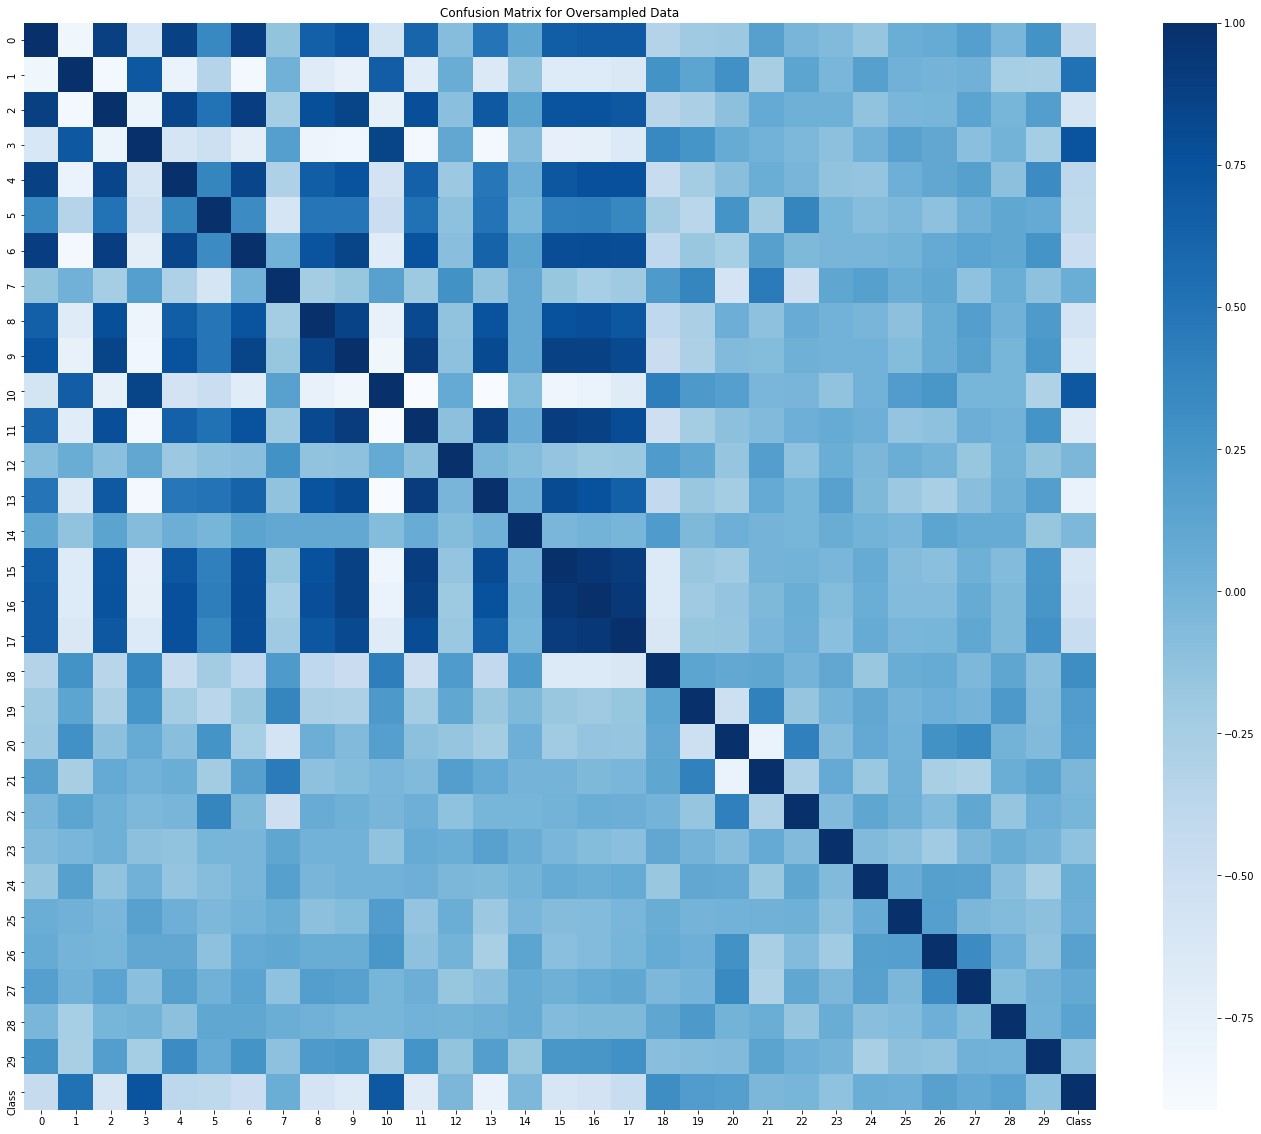

In [121]:
# Confusion Matrix of the Oversampled data to show how SMOTE results in balanced classes
plt.figure(figsize=(24,20))
over_corr = over_data.corr()
sns.heatmap(over_corr, cmap='Blues')
plt.title('Confusion Matrix for Oversampled Data')
plt.show()


### Classification with "CMTNN + SMOTE" Data

#### [1] Support Vector Machine

In [0]:
from sklearn.svm import SVC
svc = SVC()

In [0]:
svc.fit(xtrain_cm_sm, ytrain_cm_sm)
ypred = svc.predict(xtest)


In [124]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))



AUPRC score: 0.016640756339326428
AUROC score: 0.886004547745467
Accuracy score: 0.9385204171201854
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     28439
           1       0.02      0.83      0.04        42

    accuracy                           0.94     28481
   macro avg       0.51      0.89      0.50     28481
weighted avg       1.00      0.94      0.97     28481



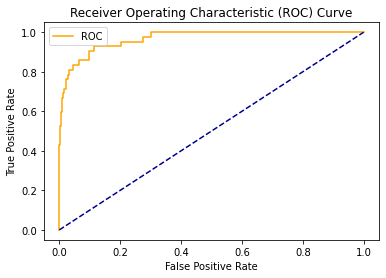

In [125]:
yscore = svc.decision_function(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore)
plot_roc_curve(fpr, tpr)


#### [2] Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(random_state=0)


In [0]:
random_clf.fit(xtrain_cm_sm, ytrain_cm_sm)
ypred = random_clf.predict(xtest)


In [128]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))


AUPRC score: 0.10320715660302954
AUROC score: 0.8890067965017857
Accuracy score: 0.9919946631087392
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28439
           1       0.13      0.79      0.22        42

    accuracy                           0.99     28481
   macro avg       0.57      0.89      0.61     28481
weighted avg       1.00      0.99      0.99     28481



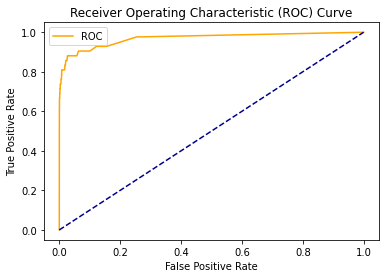

In [129]:
yscore = random_clf.predict_proba(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore[:,1])
plot_roc_curve(fpr, tpr)


#### [3] XGBoost

In [130]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain_cm_sm, ytrain_cm_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xtest_df = pd.DataFrame(xtest)
xtest_df.columns = [i for i in range(0, xtest_df.shape[1])]
xtest = xtest_df.values
ypred = xgb.predict(xtest)


In [132]:
print('AUPRC score: {}'. format(metrics.average_precision_score(ytest, ypred)))
print('AUROC score: {}'.format(metrics.roc_auc_score(ytest, ypred)))
print('Accuracy score: {}'.format(metrics.accuracy_score(ytest, ypred)))
print(metrics.classification_report(ytest, ypred))


AUPRC score: 0.02390647658781388
AUROC score: 0.8848772393376633
Accuracy score: 0.9600084266704119
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     28439
           1       0.03      0.81      0.06        42

    accuracy                           0.96     28481
   macro avg       0.51      0.88      0.52     28481
weighted avg       1.00      0.96      0.98     28481



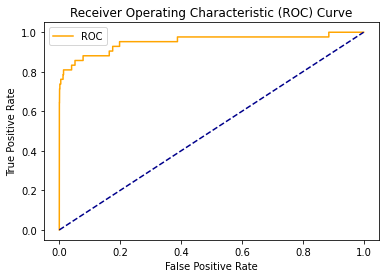

In [133]:
yscore = xgb.predict_proba(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, yscore[:,1])
plot_roc_curve(fpr, tpr)

